<a href="https://colab.research.google.com/github/armitakar/GGS366_Spatial_Computing/blob/main/Lectures/6_Spatial_operations_with_Shapely_and_GeoPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this class, we will learn about spatial data models (raster and vector), take an in-depth look at vector data geometries, and learn how to perform various spatial operations on vector data.




Spatial data can be represented using two data models: Vector and Raster.

- **Vector data** represents discrete objects on Earth that have a finite number of possible values and a defined location or boundary. Example: buildings, city boundaries etc.

- **Raster data** represents continuously-variable fields with an infinite number of possible values, where a fixed boundary cannot be defined. Example: precipitation, temperature etc.


![Image](https://cdn.prod.website-files.com/5d2dd7e1b4a76d8b803ac1aa/642d1bd9701b7ccac1e13893_jYKRsgDSe2cYDZw5HOBLPIAp0lIb-Ebx6ajxcZlRmdlrtAgHC0Gdo2Jk6jzVSopZUFLCcLoz0vseuMEq0sRodFVBtfUFafzZo1Mez85pl93fTt8tyV6dh4RjUjU7FWOU-cmx7LwxUJI_mxMFT2kH.png)

Vector data model are presented with **three geometry types: Point, LineString, and Polygon**. In python, we use the Shapely module to store, manipulate and analyze these geometric objects. Shapely stores **geometric objects as coordinate tuples**.

**Point**
- Simple, zero-dimensional objects recorded by **one coordinate tuple (x,y)**
- Example: Restaurants, points of interest

**LineString**
- Linear objects, one-dimensional, recorded by **a list of at least two coordinate tuples**
- Objects have length, starting and ending points (Nodes), and may have additional connecting points (vertices)
- Example: Roads, streets, rivers

**Polygon**
- Objects with defined areas, two-dimensional, recored by **a list of at least three coordinate tuples**
- three or more lines joined to form a closed area
- May share edges (adjacency)
- Example: states, buildings, parks, census tracts

Vector geometries can be **multi-dimensional**: Collections of points, lines, or polygons, leading to **MultiPoint**, **MultiLineString**, or **MultiPolygon** structures, respectively.

<img src="https://www.earthdatascience.org/images/courses/earth-analytics/spatial-data/points-lines-polygons-vector-data-types.png" alt="Image" width="350" height="400">

Source: https://www.earthdatascience.org/workshops/gis-open-source-python/intro-vector-data-python/



**GeoPandas internally uses Shapely objects to store vector geometries**, enabling various geometric operations (e.g., length and area calculations) and spatial operations (e.g., union, intersection, and difference) on vector geometries.

A key distinction is that while **Shapely can handle any planar geometry objects**—meaning they do not necessarily have to be geospatial (i.e., referencing a location on Earth)—**GeoPandas specifically works with georeferenced tabular data**, where each row corresponds to a geographic location.

GeoPandas extends Pandas by adding a geometry column to a standard DataFrame, turning it into a [GeoDataFrame](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html#geopandas.GeoDataFrame). In a typical Pandas DataFrame, columns represent non-spatial attributes. For example, a DataFrame containing information about Fairfax County schools may include columns for school names, capacity, and year of establishment. Each of these **columns is stored as a Pandas Series**, which is a one-dimensional array containing the values of that column along with an index.

A DataFrame becomes a **GeoDataFrame** when it **includes a geometry column**, also known as a [GeoSeries](https://geopandas.org/en/stable/docs/reference/geoseries.html). Each row in the GeoSeries contains a Shapely geometry object, representing a geographic feature—such as a point object referring to the geographic coordinates of each school.


<img src="https://carpentries-incubator.github.io/geospatial-python/fig/E07/pandas_geopandas_relation.png" alt="Image" width="700" height="500">

![image](https://geobgu.xyz/presentations/p_2023_ogh/images/gdf-structure.svg)

We will get started by importing all three libraries: Pandas, GeoPandas and Shapely

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString

# Examples of Shapely Objects

In the following examples, we will load geospatial data from various sources as GeoPandas dataframes and examine how the geometry column stores geospatial information as Shapely objects.

We will work with vector datasets in **GeoJSON format**, a JavaScript Object Notation (JSON) structure with geospatial references. The key difference between GeoJSON and traditional vector shapefiles is that GeoJSON stores all spatial and attribute information within a single file, whereas shapefiles require at least multiple files (e.g., .shp, .shx, .dbf, and .prj) to function properly. GeoJSON files are typically smaller in size, making them a preferred choice for handling large-scale geospatial data and for web mapping applications, where large file sizes can slow down map performance.

For an overview of different vector data formats used in GIS, refer to this resource: https://gisgeography.com/gis-formats/  

### Example Datasets
The datasets in these examples are primarily sourced from [ArcGIS Server web services](https://doc.arcgis.com/en/arcgis-online/reference/arcgis-server-services.htm), hosted by various agencies. For instance, Fairfax County maintains an [open geospatial data portal](https://www.fairfaxcounty.gov/maps/open-geospatial-data), where users can browse datasets and view them using ArcGIS Online Map Viewer.

To download data from ArcGIS Online, follow these steps:

- Navigate to the ArcGIS Online Map Viewer page where the dataset is hosted, such as hospitals and urgent care facilities data.
- In the bottom left corner, click "I want to use this."
- Click "View API Resources."
- Copy and paste the GeoJSON link for downloading.

### Point

In this first example, we're retrieving hospital and urgent care facility locations in Fairfax County as point data

In [2]:
# data source: https://www.fairfaxcounty.gov/maps/open-geospatial-data
hospitals = gpd.read_file("https://services1.arcgis.com/ioennV6PpG5Xodq0/ArcGIS/rest/services/OpenData_S1/FeatureServer/5/query?outFields=*&where=1%3D1&f=geojson")

<Axes: >

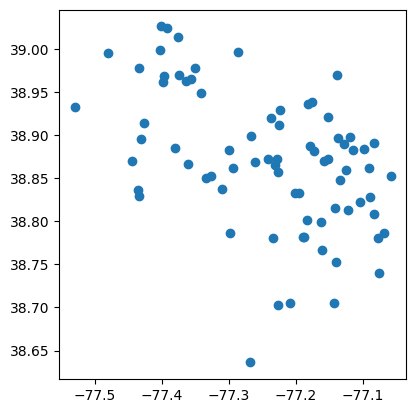

In [3]:
# checking how the data looks like
hospitals.plot()

In [4]:
'''If you check the data type of the geometry at any index position in the dataset
— for example, the geometry value at the first index — you will see that they are all stored as a Shapely Point object.'''

type(hospitals.geometry[0])

shapely.geometry.point.Point

POINT (-77.364599906005 38.9624394573364)


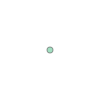

In [5]:
'''You can also print the geometry for any index position to see the coordinate tuple representing the location
and visualize the point location by calling it.'''

print(hospitals.geometry[0])
hospitals.geometry[0]

In [6]:
# Like any other dataframe, you can check the attributes/column names we retrieved with this dataset.
hospitals.columns

Index(['OBJECTID', 'TYPE', 'DESCRIPTION', 'JURISDICTION', 'WEB_ADDRESS',
       'STREET_NUMBER', 'STREET_NAME', 'CITY', 'ZIP', 'ERC_PHONE', 'GlobalID',
       'CreationDate', 'Creator', 'EditDate', 'Editor', 'geometry'],
      dtype='object')

In [7]:
# You can also check the number of datapoints/hospitals we have in this dataset
hospitals.shape

(76, 16)

### LineString

Similarly, we are downloading road network data as LineString from TIGER/Line Shapefiles for Fairfax County, VA. In this case: Virginia FIPS code: 51  and Fairfax County FIPS code: 059.

In [8]:
# data source: https://www2.census.gov/geo/tiger/TIGER2022/ROADS/
road = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2022/ROADS/tl_2022_51059_roads.zip")

<Axes: >

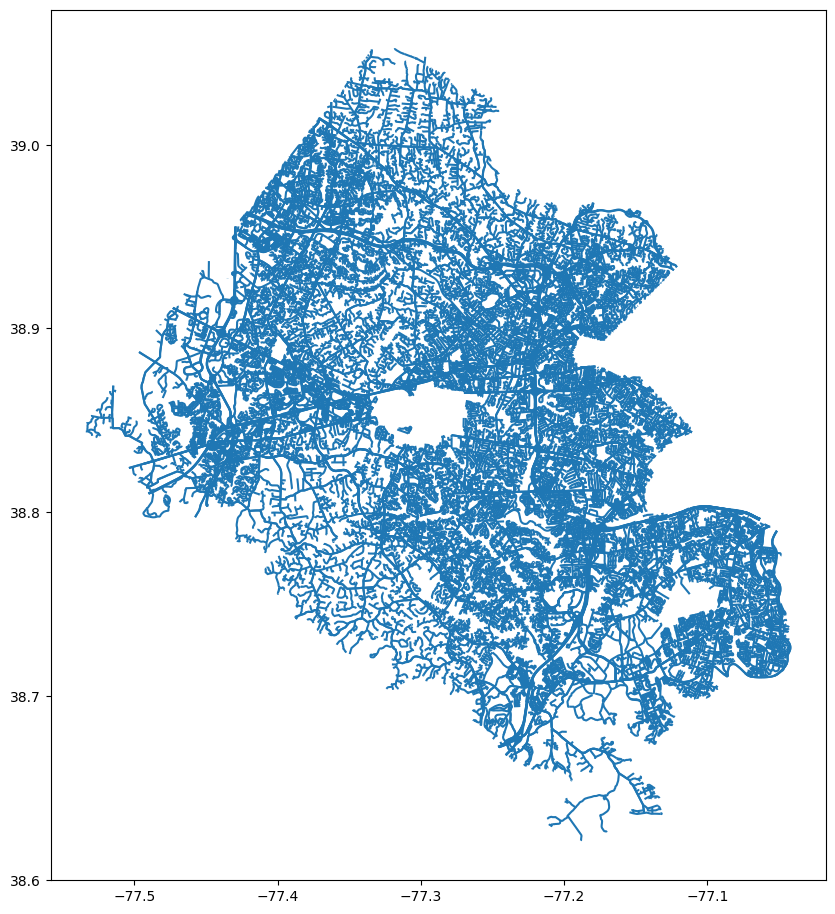

In [9]:
# checking the data
road.plot(figsize=(10, 20))

<class 'shapely.geometry.linestring.LineString'>
LINESTRING (-77.310948 39.019957, -77.310881 39.019115)


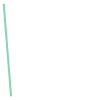

In [10]:
'''same way, you can print the geometry type for any index position,
retrieve the list of coordinate tuples associated with the LineString, and display the geometry itself'''

print(type(road.geometry[0]))
print(road.geometry[0])
road.geometry[0]

<class 'shapely.geometry.linestring.LineString'>
LINESTRING (-77.228842 38.712374, -77.229649 38.712097, -77.229914 38.712473)


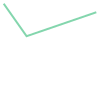

In [11]:
# LineSting can have more than two coordinate tuples, representing additional vertices
print(type(road.geometry[4]))
print(road.geometry[4])
road.geometry[4]

### Polygon

We are also retrieving Virginia census tract boundaries as polygons from TIGER/Line Shapefiles.

In [12]:
# data source: https://www2.census.gov/geo/tiger/TIGER2022/TRACT/
va_tract = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2022/TRACT/tl_2022_51_tract.zip")

<Axes: >

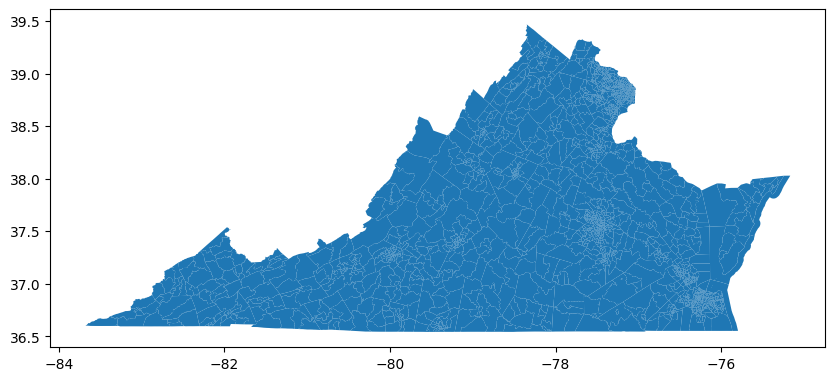

In [13]:
# checking the data
va_tract.plot(figsize=(10, 20))

<class 'shapely.geometry.polygon.Polygon'>
POLYGON ((-77.100572 38.887624, -77.100389 38.88762, -77.100156 38.88763, -77.100026 38.887621, -77.099948 38.887607, -77.099876 38.88758, -77.09985 38.887565, -77.099769 38.887519, -77.099699 38.887464, -77.099693 38.887428, -77.099675 38.88732, -77.09967 38.887285, -77.099576 38.887291, -77.099294 38.887316, -77.099201 38.887326, -77.099223 38.887493, -77.09929 38.887994, -77.099313 38.888162, -77.099333 38.888348, -77.099353 38.888532, -77.099385 38.888909, -77.099401 38.889098, -77.099349 38.889101, -77.099336 38.889103, -77.099267 38.889113, -77.099196 38.889133, -77.099148 38.889151, -77.098996 38.889237, -77.098909 38.889288, -77.098545 38.889506, -77.098396 38.889597, -77.098213 38.889693, -77.097666 38.889984, -77.097484 38.890081, -77.097272 38.890174, -77.096786 38.890388, -77.096635 38.890447, -77.096421 38.890533, -77.096186 38.890628, -77.095485 38.890916, -77.095251 38.891013, -77.095028 38.891104, -77.09436 38.891379, -77.09413

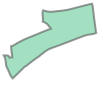

In [14]:
'''same way, you can print the geometry type for any index position,
retrieve the list of coordinate tuples associated with the polygon, and display the geometry itself'''

print(type(va_tract.geometry[0]))
print(va_tract.geometry[0])
va_tract.geometry[0]

In [15]:
va_tract.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

# Query and filtering with spatial data

Spatial data can be queried or filtered based on both its attributes and geometric properties.

### By Attributes

Filtering spatial data by attributes is similar to how you would query a Pandas DataFrame using comparison and boolean operators.

- Comparison operators: >, <, ==, !=
- Boolean operators:
  - | (OR)
  - & (AND)
  - ~ (NOT)

<Axes: >

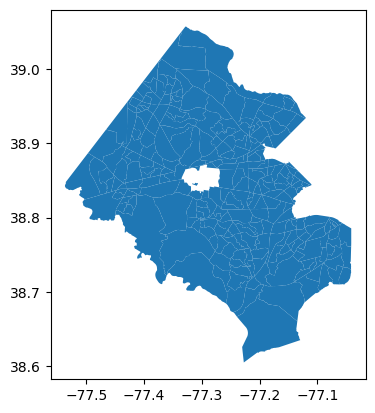

In [16]:
# for instance extracting censustract boundaries only within Fairfax County based on its FIPS code
fairfax_county = va_tract[va_tract['COUNTYFP'] == '059']
fairfax_county.plot()

### By Location


Spatial filtering by location selects geometries based on their spatial relationship to geometries in another dataset. This is commonly used to extract features from one layer that meet specific spatial conditions relative to another layer.

However, to perform spatial filtering, **both datasets must be in the same coordinate reference system (CRS) to ensure accurate spatial comparisons**.

The geometry column in a GeoDataFrame (GeoSeries) allows data extraction based on various binary predicates, including:

- **Intersects** → Geometries that share any portion of space with another geometry.
- **Touches** → A geometry that only touches another.
- **Within** → Geometries that are fully inside another geometry.
- **Contains** → A geometry that completely encloses another.

There are many other binary predicates available for filtering. For more details, refer to the official GeoPandas documentation:
https://geopandas.org/en/stable/docs/reference/geoseries.html

The output of spatial filtering depends on the type of binary predicates used. For example, if we want to select roads within Fairfax County Tract 461700, the results will differ based on whether we use intersects, within, or contains. Each method provides a different subset of data, emphasizing the importance of choosing the right spatial filter depending on your analysis.


In [17]:
# first we need to check their CRS, in this case, they are the same, so no need to transform
print(road.crs)
print(fairfax_county.crs)

EPSG:4269
EPSG:4269


In [18]:
# Next we select the tract 461700, for which we want to identify the roads
tract = fairfax_county[fairfax_county['TRACTCE'] == '461700']
tract

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
2048,51,059,461700,51059461700,4617,Census Tract 4617,G5020,S,2288147,11583,+38.8689851,-077.2532257,"POLYGON ((-77.27411 38.86638, -77.27398 38.866..."


**An important note here**: When performing spatial filtering, the row index values of the filtered data remain the same as in the original dataset. Filtering does not automatically reassign new index values.

For example, the index value for Tract 461700 is 2048 in the original dataset, and it will remain 2048 in the subset data unless we explicitly reset the index using the reset_index() method. This means that whenever we need to reference the geometry or attributes for Tract 461700 in the filtered data, we should continue using the original index value (2048).

If needed, we can reset the index for sequential numbering, but in this example, we did not apply reset_index().

<Axes: >

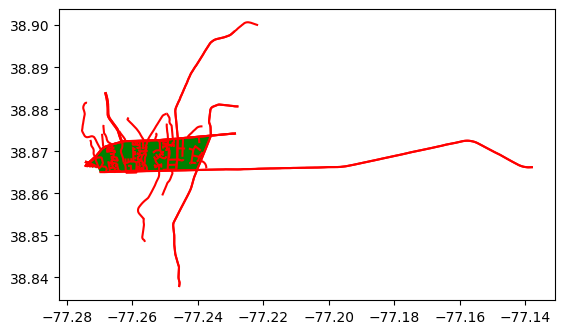

In [19]:
''' Here In this example, we are subsetting the road data that intersects with the geometry of Tract 461700.
Note that we used the original index value (2048) to refer to the tract geometry.
This filtering returns a subset of roads that touch or overlap with the tract boundary.'''

road_in_tract = road[road.geometry.intersects(tract.geometry[2048])]

# plotting the output, green layout is the tract boundary, red lines are the output roads
plot1=tract.plot(color = "green")
road_in_tract.plot(ax=plot1, color = "red")

<Axes: >

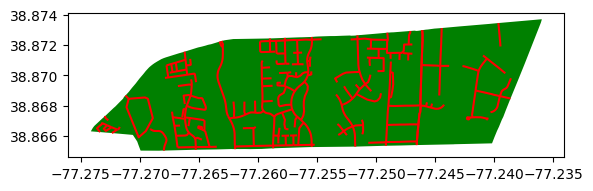

In [20]:
''' Here In this example, we are subsetting the road data which locates within the geometry of Tract 461700.
This filtering returns a subset of roads that are completely inside the tract.'''

road_in_tract = road[road.geometry.within(tract.geometry[2048])]

# plotting the output, green layout is the tract boundary, red lines are the output roads
plot1=tract.plot(color = "green")
road_in_tract.plot(ax=plot1, color = "red")

<Axes: >

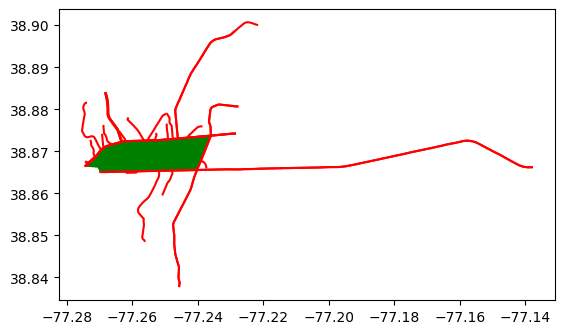

In [21]:
''' Here In this example, we are subsetting the road data which locates within the geometry of Tract 461700.
This filtering returns a subset of roads that only touches the tract boundary.'''
road_in_tract = road[road.geometry.touches(tract.geometry[2048])]

# plotting the output, green layout is the tract boundary, red lines are the output roads
plot1=tract.plot(color = "green")
road_in_tract.plot(ax=plot1, color = "red")

Let's do another example. We want to know which hospital locations (data we retrieved before from Fairfax County open data portal) actually falls within Fairfax County.

In [22]:
# first check CRS of the datasets
print(hospitals.crs)
print(fairfax_county.crs)

EPSG:4326
EPSG:4269


In [23]:
# they are differnt, so one of them need to be converted. We can use the to_crs() option.
# here I am saying that convert the fairfax_county CRS to the same as hospitals CRS.
fairfax_county = fairfax_county.to_crs(hospitals.crs)

In [24]:
# you can double-check again to make sure they are converted to the same
print(hospitals.crs)
print(fairfax_county.crs)

EPSG:4326
EPSG:4326


<Axes: >

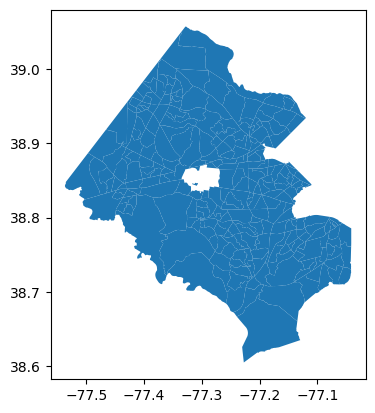

In [25]:
# now the Fairfax County GeoDataframe has multiple polygon geometries, representing multiple tracts
fairfax_county.plot()

We can combine multiple polygon geometries into a MultiPolygon using unary_union.

This step is necessary because spatial filtering requires a single Shapely geometry object. If we try to filter using an entire geometry column (GeoSeries), it won't work.

By applying unary_union, we merge all Shapely polygon objects in the fairfax_county geometry column into a single MultiPolygon, making it compatible for spatial queries

<ipython-input-26-8973c2381a23>:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  fairfax_county_geom = fairfax_county.geometry.unary_union


<class 'shapely.geometry.multipolygon.MultiPolygon'>


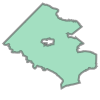

In [26]:
# using unary_union for merging the polygons into multipolygons
fairfax_county_geom = fairfax_county.geometry.unary_union
print(type(fairfax_county_geom))
fairfax_county_geom

(48, 16)


<Axes: >

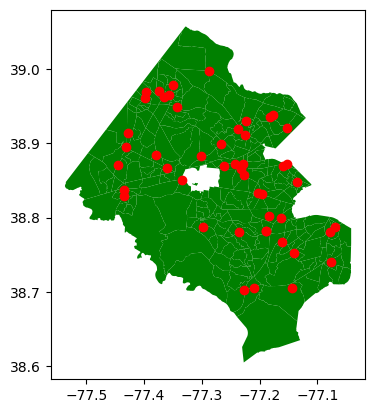

In [27]:
# now we can perform spatial filtering with this multipolygon
hospitals_in_fairfax = hospitals[hospitals.within(fairfax_county_geom)]
# you can see 48 out of 76 hospitals are located within the Fairfax County boundaries
print(hospitals_in_fairfax.shape)

# plotting the output
plot1=fairfax_county.plot(color = "green")
hospitals_in_fairfax.plot(ax=plot1, color = "red")

Another example where we want to identify the name of the census tract within which the first hospital (at index 0) is located. Here, we use the contains function for spatial filtering.

Note the difference between contains and within functions: a polygon containing a point vs. a point within a polygon.

In [28]:
# filtering which tract contains the first hospital
counties_with_hospitals = fairfax_county[fairfax_county.contains(hospitals.geometry[0])]
counties_with_hospitals

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
1116,51,059,482203,51059482203,4822.03,Census Tract 4822.03,G5020,S,1956529,26369,+38.9596340,-077.3624427,"POLYGON ((-77.3744 38.95287, -77.37436 38.9529..."


<Axes: >

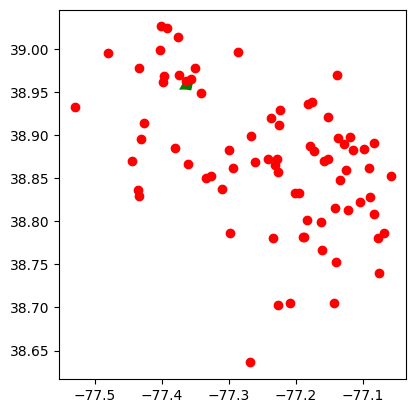

In [29]:
# plotting the output
plot1=counties_with_hospitals.plot(color = "green")
hospitals.plot(ax=plot1, color = "red")

# Spatial join

Now, spatial filtering only returns data subsets; it does not merge attributes from both DataFrames. To achieve this, we can use a spatial join with the **sjoin function**.

Within sjoin, you need to define the binary predicate (as discussed earlier). Additionally, you must specify the join type:

- Left join → Keeps all rows from the left DataFrame.
- Right join → Keeps all rows from the right DataFrame.
- Inner join → Keeps only rows where the binary predicate is True in both DataFrames.

Here are some great resources for further information:
- https://geopandas.org/en/stable/gallery/spatial_joins.html
- https://pygis.io/docs/e_spatial_joins.html

Let's say, we want to join the road dataset with Tract 461700 data.
Again, **both datasets need to have the same CRS**.

In [30]:
#checking CRS first
print(road.crs)
print(tract.crs)

EPSG:4269
EPSG:4269


In [31]:
# Next we're joining them based on where they intersects and asking to retain the rows only when binary predicate is true.
roads_in_tracts = road.sjoin(tract, how="inner", predicate="intersects")
# here you can see that columns from both datasets are present in the output dataset
roads_in_tracts.columns

Index(['LINEARID', 'FULLNAME', 'RTTYP', 'MTFCC_left', 'geometry',
       'index_right', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME',
       'NAMELSAD', 'MTFCC_right', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON'],
      dtype='object')

<Axes: >

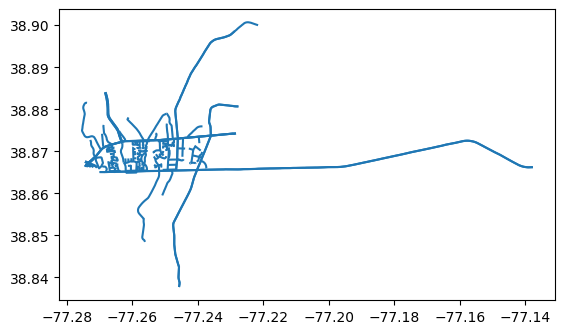

In [32]:
# this is what the output dataset looks like
roads_in_tracts.plot()

# Proximity analysis

### Buffering
Buffering is a type of proximity analysis used to identify areas within a specified distance threshold from a given location. For example, to determine a hospital’s service area, we can create a 5 km buffer around each hospital, assuming that anyone within this buffer can access hospital services.

To create a buffer, the spatial measurements must be in linear units (e.g., meters or kilometers). This means the dataset must be in a projected coordinate system (PCS) rather than a geographic coordinate system (latitude/longitude).

Here's some additional information: https://pygis.io/docs/e_buffer_neighbors.html


In [33]:
# our hospital dataset is in geographic coordinate system
hospitals.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
# we can convert it to a PCS, say WGS 84 Pseudo-Mercator (EPSG:3857)
hospitals = hospitals.to_crs(epsg=3857)

In [35]:
# now we create the buffer around each hospital using the buffer function
hospitals_buffer = hospitals.buffer(5000)
hospitals_buffer

,0
0,"POLYGON ((-8607187.867 4716292.774, -8607211.9..."
1,"POLYGON ((-8615066.717 4698307.981, -8615090.7..."
2,"POLYGON ((-8573180.948 4700651.098, -8573205.0..."
3,"POLYGON ((-8584255.046 4703092.672, -8584279.1..."
4,"POLYGON ((-8591843.259 4701326.452, -8591867.3..."
...,...
71,"POLYGON ((-8610966.139 4716188.648, -8610990.2..."
72,"POLYGON ((-8603024.365 4700624.383, -8603048.4..."
73,"POLYGON ((-8611478.775 4721512.586, -8611502.8..."
74,"POLYGON ((-8611318.455 4725429.584, -8611342.5..."


<Axes: >

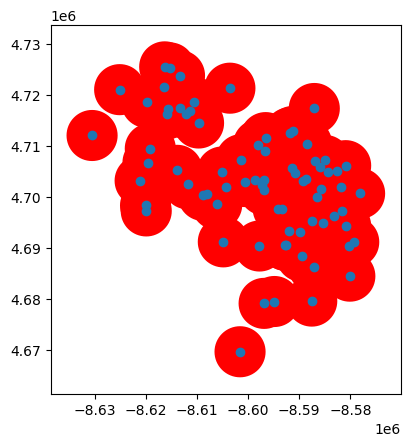

In [36]:
# we can also plot the buffer areas
plot1=hospitals_buffer.plot(color = "red")
hospitals.plot(ax=plot1)



In [37]:
# note that the output is a geoseries, not a geodataframe
type(hospitals_buffer)

geopandas.geoseries.GeoSeries

In [38]:
# we can easily convert them to a geodataframe by updating the geometry type

# Generalization

### Dissolve

Spatial data are often more detailed than needed. In such cases, we may need to generalize the data by aggregating geometric properties based on attribute values. This can be done using the dissolve function that merges geometries into a single geometry if they share the same dissolve attribute value. Additionally, we can aggregate remaining attribute values by specifying an aggregation function.

For more details on the dissolve function, visit these pages:
- https://geopandas.org/en/stable/docs/user_guide/aggregation_with_dissolve.html
- https://pygis.io/docs/e_vector_merge_dissolve.html

Say we do not need Virginia boundary data at the tract level but only at the county level. we can use dissolve to merge tracts into counties. Additionally, say, we want to calculate the average tract area size for each county. We can use the aggregation function for that.

In [39]:
# first we want to convert the va_tract data to a projected corodiante system so that we can calculate the area
va_tract = va_tract.to_crs(epsg=3857)
# calculating the area of polygons
va_tract['area_km2'] = va_tract['geometry'].area / 1e6
# extracting a subset of columns that will be used for dissolving and aggregation
va_tract = va_tract[['COUNTYFP', 'geometry', 'area_km2']]

In [40]:
# dissolving by counties and aggregating the area measures as their average
va_tract1 = va_tract.dissolve(by='COUNTYFP', aggfunc='mean')
va_tract1

,geometry,area_km2
COUNTYFP,,
001,"POLYGON ((-8423152.131 4504489.394, -8423339.5...",362.570046
003,"POLYGON ((-8723821.401 4570574.729, -8723835.4...",104.648562
005,"POLYGON ((-8892971.367 4564308.049, -8892934.0...",311.355623
007,"POLYGON ((-8666422.845 4488685.378, -8666420.9...",490.494300
009,"POLYGON ((-8809629.804 4497627.871, -8809630.5...",197.979198
...,...,...
800,"POLYGON ((-8563569.424 4378242.57, -8563547.27...",48.096518
810,"POLYGON ((-8476263.217 4405313.806, -8477174.8...",17.967129
820,"POLYGON ((-8788471.308 4587549.277, -8788494.1...",12.648753


<Axes: >

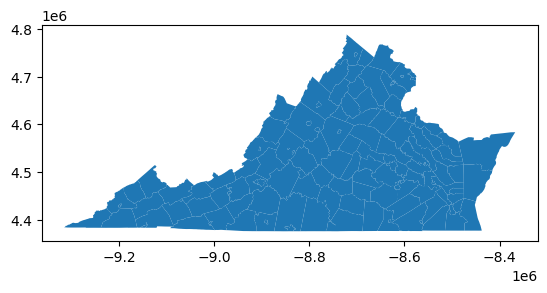

In [41]:
# this is the dissolved boundary
va_tract1.plot()

# Spatial overlay

Spatial overlay is similar to a spatial join, as both combine two or more spatial datasets. However, there is a key difference:

- **Spatial overlay** creates new geometries based on the chosen overlay operation (e.g., intersection, union, difference). More appropriate for polygon-to-polygon or line-to-polygon merging.
- **Spatial join** merges attributes from one dataset to another based on their spatial relationship, without modifying the geometry. More appropriate for point-to-line or point-to-polygon merging.

GeoPandas supports several overlay operations, including:

- **Intersection** → Returns only the areas common to both layers.
- **Union** → Merges both layers, keeping all areas from both datasets.
- **Symmetrical Difference** → Keeps areas that are in either layer but not in both.
- **Difference** → Returns areas that are in the first layer but not in the second.

**The CRS of all datasets need to be the same to perform spatial overlay.**

![image](http://docs.qgis.org/testing/en/_images/overlay_operations.png)

Check out these pages to learn more:
- https://geopandas.org/en/stable/docs/reference/api/geopandas.overlay.html
- https://geopandas.org/en/stable/gallery/overlays.html
- https://pygis.io/docs/e_vector_overlay.html



In [42]:
# first we retrieve Fairfax County Park dataset from the open data portal
parks = gpd.read_file("https://services1.arcgis.com/ioennV6PpG5Xodq0/ArcGIS/rest/services/OpenData_A1/FeatureServer/5/query?outFields=*&where=1%3D1&f=geojson")

In [43]:
# check CRS
print(parks.crs)
print(tract.crs)

EPSG:4326
EPSG:4269


In [44]:
# needs conversion
parks = parks.to_crs(tract.crs)

In [45]:
# overlay based on intersection operation
parks_in_tract = gpd.overlay(parks, tract, how='intersection')
# it only returns two geometries
parks_in_tract

,OBJECTID,PREG,TMP_NAME,PARK_NAME,MAINTENANCE_AREA,SUPERVISOR_DISTRICT,PLANNING_DISTRICT,PARK_CLASSIFICATION,MASTER_PLANNED,MASTER_PLAN_APPROVAL_DATE,...,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,221,314,None,Towers,"Area 1, Area 2",Providence,"Fairfax, Vienna",Local,Yes,1.025050e+12,...,51059461700,4617,Census Tract 4617,G5020,S,2288147,11583,+38.8689851,-077.2532257,"POLYGON ((-77.2693 38.86963, -77.26933 38.8696..."
1,314,369,None,Armistead,Area 1,Providence,Vienna,Resource Based,No,NaN,...,51059461700,4617,Census Tract 4617,G5020,S,2288147,11583,+38.8689851,-077.2532257,"POLYGON ((-77.2545 38.87072, -77.25423 38.8707..."


<Axes: >

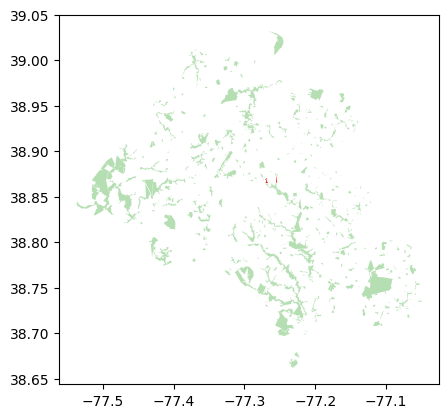

In [46]:
# the tiny red polygons in the middle are the output geometries
plot1=parks.plot(color = "#B5DFB2")
parks_in_tract.plot(ax=plot1, color = "red")

In [47]:
# here's an example for overlay using union. Say we want to merge roads of fairfax County and Prince William County (FIPS 153)
# data source: https://www2.census.gov/geo/tiger/TIGER2022/ROADS/
road_059 = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2022/ROADS/tl_2022_51059_roads.zip")
road_153 = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2022/ROADS/tl_2022_51153_roads.zip")

In [48]:
# check CRS
print(road_059.crs)
print(road_153.crs)

EPSG:4269
EPSG:4269


<ipython-input-49-6639244cccbf>:2: UserWarning: `keep_geom_type=True` in overlay resulted in 49 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  roads_combined = gpd.overlay(road_059, road_153, how='union')


<Axes: >

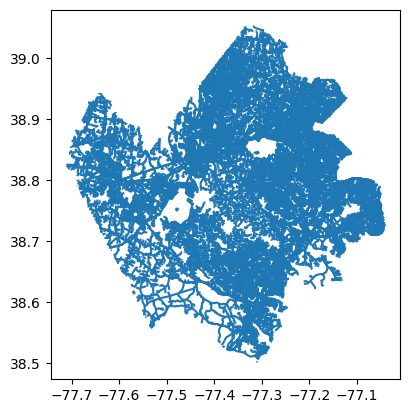

In [49]:
# combine using union
roads_combined = gpd.overlay(road_059, road_153, how='union')
# here's the combined road data
roads_combined.plot()